# Chapter 7 Solvers

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## 7.1 方程式についての注意

`Sympy`での方程式は`Eq`関数を使う

In [2]:
Eq(x,y)

In [3]:
solveset(Eq(x**2, 1), x) #Eq(左辺, 右辺)

In [4]:
solveset(Eq(x**2 - 1, 0), x)

In [5]:
solveset(x**2 - 1, x) #式 = 0　とした「式」が第一引数

--->`Sympy`では、式はすべて`=0`とみなされる. `Eq`関数を使わなくても、差で表現してやればよい.

## 7.2 代数的に方程式を解く

代数方程式を解く基本的な関数は`solveset(equation, variable=None, domain=S.Complexes)`. 

他に関数`solve()`があるが、基本的には関数`solveset()`を用いる.

In [6]:
solveset(x**2-x, x)

In [7]:
solveset(x - x, x, domain=S.Reals)

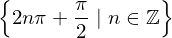

In [8]:
solveset(sin(x) - 1, x, domain=S.Reals)

--->勝手に`n`を導入して解いてくれる.

#### 解がないときは空集合を返す:

In [9]:
solveset(exp(x),x)

In [10]:
solveset(cos(x) - x, x)

#### 連立方程式: `linsolve関数`

In [11]:
linsolve([x + y + z - 1, x + y + 2*z -3], (x, y, z))

In [12]:
linsolve(Matrix((
    [1, 1, 1, 1],
    [1, 1, 2, 3])), (x, y, z)) #Matrix関数についてはChapter 8

In [13]:
M = Matrix(((
1, 1, 1, 1),
 (1, 1, 2, 3)   
))

In [14]:
system = A, b = M[:,:-1], M[:,-1]

In [15]:
linsolve(system, x, y, z)

ただし高次の式になると,

In [16]:
solveset(x**3 - 6*x**2 + 9*x, x)

となって、解の重根の有無と縮退度がわからない. そこで

In [17]:
roots(x**3 - 6*x**2 + 9*x, x)

とすれば、解`0`が1個、解`3`が2個出てくるとわかる.　実際

In [18]:
factor(x**3 - 6*x**2 + 9*x)

**注意**: `solveset`の使えない方程式
    - 非線形多変数系
    - LambertWで解ける方程式

こういう場合は`solve()`関数で解ける:

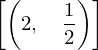

In [19]:
solve([x*y - 1, x -2], x, y)

オプション`dict ='True'`を付けると結果がリストの要素としての辞書型で得られる.

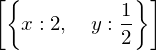

In [2]:
solve([x*y - 1, x -2], x, y, dict ='True')

In [20]:
solve(x*exp(x) - 1, x)

## 7.3 微分方程式を解く

関数の設定: SymPyオブジェクトへ。

In [9]:
f, g = symbols('f g', cls=Function) #解きたいものが関数なので、cls=Function オプションを付ける.

In [10]:
f(x)

☆導関数は、Chapter 6 でやったように、関数Derivative()を使ってもできるし、

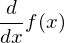

In [11]:
Derivative(f(x),x,1)

未知関数 `f(x)` に対するメソッド `diff` を用いても良い:

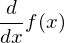

In [23]:
f(x).diff(x)

**コメント**

ここでdiffメソッドが使えたのは、未知関数f(x)に対して用いているため。

==> 今、微分方程式$$f''(x)-2f'(x)+f(x)=\sin(x)$$を解くことを考える. これは

In [24]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x),  sin(x))

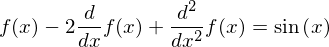

In [25]:
diffeq #微分方程式

微分方程式は`dsolve`関数で解ける！

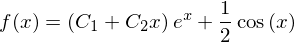

In [26]:
dsolve(diffeq, f(x)) #第二引数で解きたい関数を指定

In [27]:
dsolve(f(x).diff(x)*(1-sin(f(x))),f(x))

次が最後！ [Chapter8 Matrices](https://hiroyuki827.github.io/SymPy_tutorial/Chapter8_Matrices.html)へ!